In [1]:
suppressMessages(library(ArchR))

suppressMessages(library(tidyverse))

ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)

In [2]:
##################################
### set Arrow File parameters ####
addArchRThreads(threads = 10)

##################################
### load rheMac10 ArchR genome ###
GENOMEDIR='/home/bnphan/resources/genomes/rheMac10'
load(file.path(GENOMEDIR,'rheMac10_liftoff_GRCh38.p13_ArchR_annotations.rda'))

PROJDIR='../../../data/tidy_data/ArchRProjects'
ARCHDIR=file.path(PROJDIR,'ArchR_Multiome_DLPFC')
proj = loadArchRProject(ARCHDIR)

Setting default number of Parallel threads to 10.

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
       

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-5317c78b874c5-Date-2021-10-21_Time-16-43-18.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-5317c78b874c5-Date-2021-10-21_Time-16-43-18.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-5317c1d963a99-Date-2021-10-21_Time-16-43-19.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-5317c1d963a99-Date-2021-10-21_Time-16-43-19.log



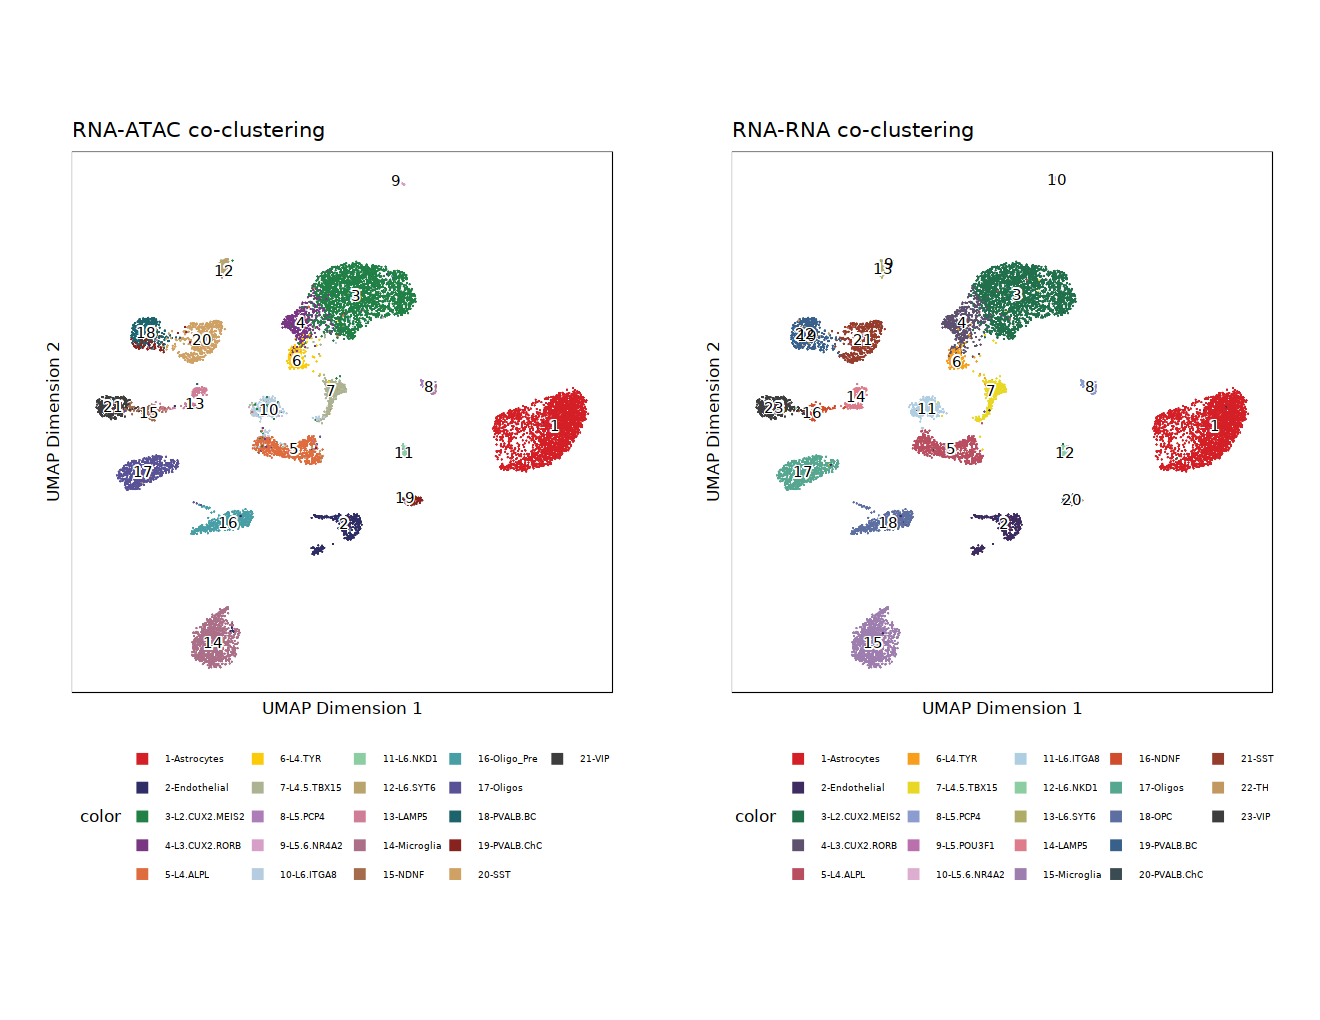

In [3]:
## make UMAP plots

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "predictedGroup_RNA2ATACCo", embedding = "UMAPH_Combined")+ 
    ggtitle('RNA-ATAC co-clustering')

p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "predictedGroup_RNA2RNACo", embedding = "UMAPH_Combined") + 
    ggtitle('RNA-RNA co-clustering') 

ggAlignPlots(p2, p3, type = "h")

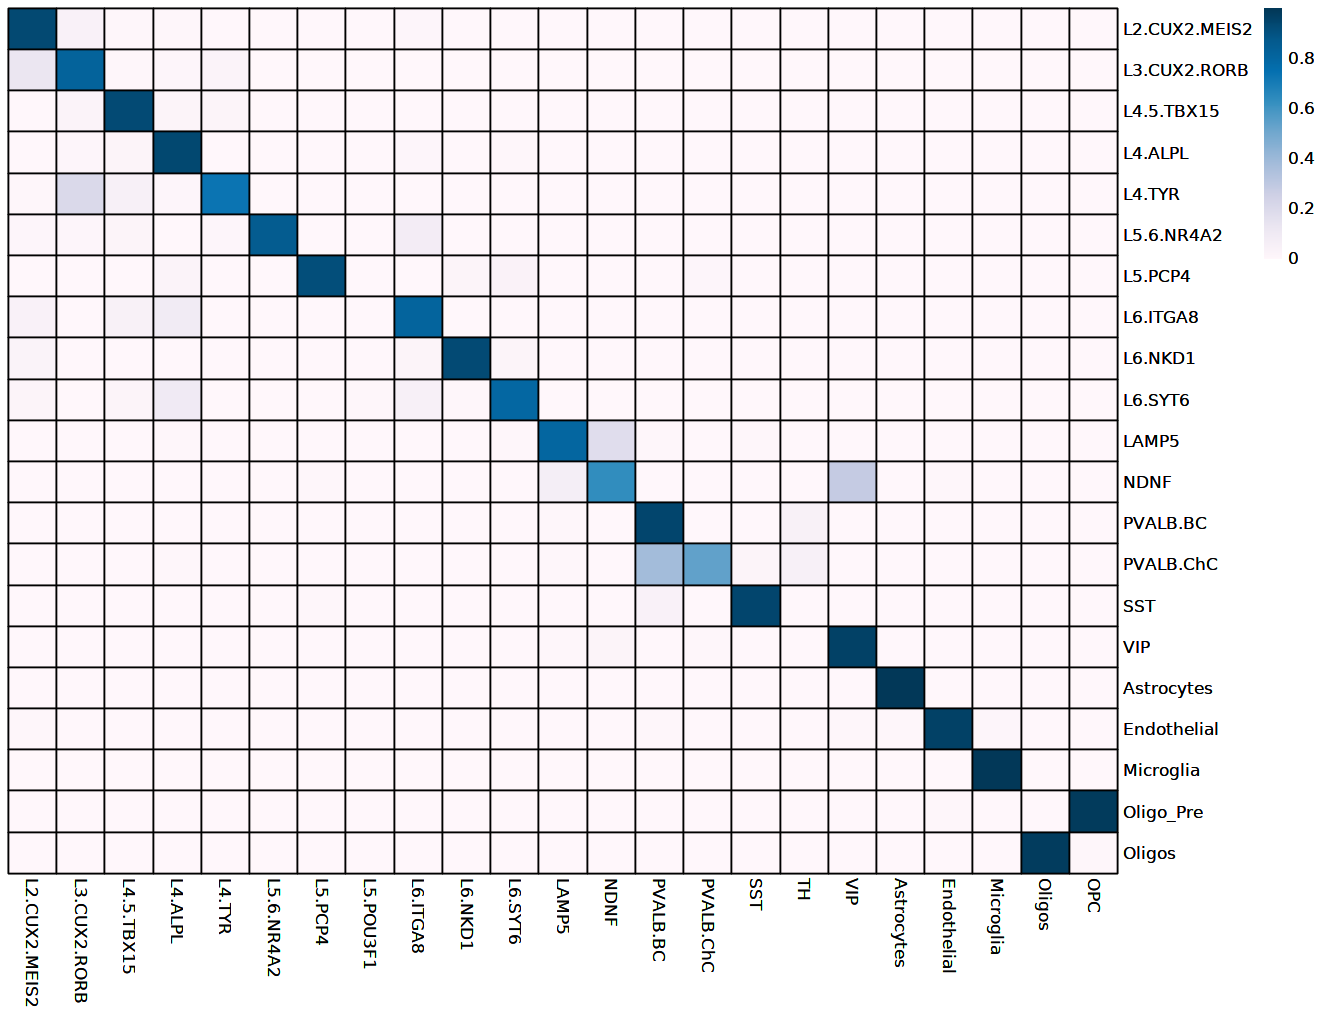

In [11]:
# plot the confusion matrix of cell types by subjects
cM <- confusionMatrix(as.character(proj$predictedGroup_RNA2ATACCo), 
                      as.character(proj$predictedGroup_RNA2RNACo))
cM <- cM / Matrix::rowSums(cM)

rowOrder = proj %>% getCellColData() %>% as.data.frame() %>%
    mutate(tmp = as.character(predictedGroup_RNA2RNACo)) %>%
    arrange(!grepl('^L[2-6]', tmp), !grepl('VI|PV|LA|ND|SS|TH' ,tmp), tmp) %>%
    filter(!duplicated(tmp)) %>% pull(tmp)

colOrder = proj %>% getCellColData() %>% as.data.frame() %>%
    mutate(tmp = as.character(predictedGroup_RNA2ATACCo)) %>%
    arrange(!grepl('^L[2-6]', tmp), !grepl('VI|PV|LA|ND|SS|TH', tmp), tmp) %>%
    filter(!duplicated(tmp)) %>% pull(tmp)

cM = cM[colOrder, rowOrder]

p <- pheatmap::pheatmap(
  mat = as.matrix(cM),  cluster_rows = FALSE, cluster_cols = FALSE,
  color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

In [12]:
pdf('../../../figures/exploratory/visualize_multiome_clusters_DLPFC/RNA_ATAC_multiome_UMAP_DLPFC.pdf',
    height = 8, width = 12, onefile = FALSE)
ggAlignPlots(p2, p3, type = "h")
dev.off()

pdf('../../../figures/exploratory/visualize_multiome_clusters_DLPFC/RNA2RNA_ATAC2RNA_co-clustering_agreement.pdf', 
    height = 4, width = 4, onefile = FALSE)
p
dev.off()

png 
  2

png 
  2